# Importing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preprocessing our data

In [4]:
data=np.array(data)

In [5]:
X=data[:,1:]

In [6]:
Y=data[:,0]

In [7]:
X=X.reshape((-1,28,28,1))

In [8]:
X.shape

(42000, 28, 28, 1)

In [9]:
from keras.layers import *
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
Y=np_utils.to_categorical(Y)  ##converting Y into one hot notation

In [11]:
Y.shape

(42000, 10)

# Compiling Model

In [12]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

# Visualize some of the images

In [14]:
import matplotlib.pyplot as plt

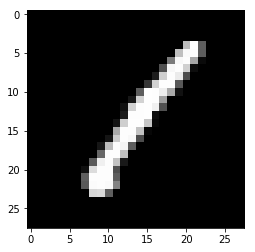

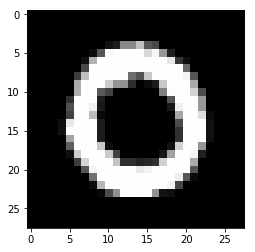

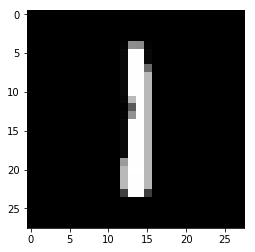

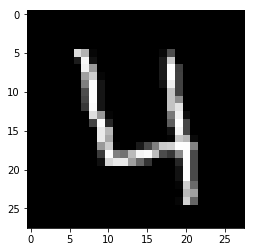

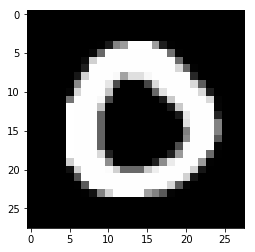

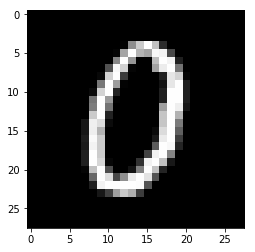

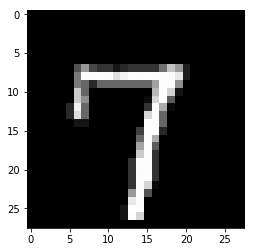

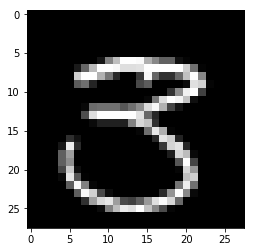

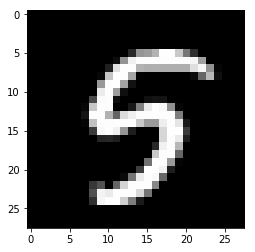

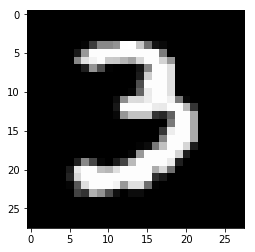

In [15]:
for i in range(10):
    plt.imshow(X[i].reshape(28,28),cmap='gray')
    plt.show()

# Training the model

In [16]:
hist=model.fit(X,Y,batch_size=128,epochs=5,shuffle=True,validation_split=0.20)

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 102s 3ms/step - loss: 1.6586 - acc: 0.6695 - val_loss: 1.1635 - val_acc: 0.9031
Epoch 2/5
33600/33600 [==============================] - 105s 3ms/step - loss: 0.7450 - acc: 0.9379 - val_loss: 0.4505 - val_acc: 0.9590
Epoch 3/5
33600/33600 [==============================] - 99s 3ms/step - loss: 0.3236 - acc: 0.9632 - val_loss: 0.2222 - val_acc: 0.9706
Epoch 4/5
33600/33600 [==============================] - 99s 3ms/step - loss: 0.1958 - acc: 0.9704 - val_loss: 0.1582 - val_acc: 0.9755
Epoch 5/5
33600/33600 [==============================] - 110s 3ms/step - loss: 0.1448 - acc: 0.9752 - val_loss: 0.1313 - val_acc: 0.9774


## Ran the model for around 7 epochs and noticed after 5 epochs my model was overfitting. Had to do an early stopping

In [21]:
np.argmax(model.predict(X[5].reshape(1,28,28,1)))

0

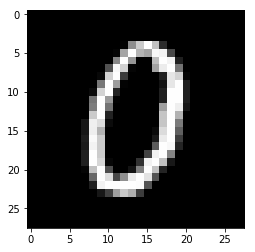

In [22]:
plt.imshow(X[5].reshape(28,28),cmap='gray')

In [23]:
data2=pd.read_csv('test.csv')

In [24]:
data2.shape

(28000, 784)

In [25]:
X_test=np.array(data2)

In [26]:
X_test=X_test.reshape(-1,28,28,1)

In [27]:
X_test.shape

(28000, 28, 28, 1)

In [28]:
Y_predicted=model.predict(X_test)

In [29]:
Y_predicted.shape

(28000, 10)

In [30]:
Y_predicted=np.argmax(Y_predicted,axis=1)

In [31]:
Y_predicted[:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3], dtype=int64)

In [32]:
Y_predicted=Y_predicted.reshape((-1,1))
Y_predicted.shape

(28000, 1)

In [33]:
temp=np.arange(1,Y_predicted.shape[0]+1).reshape(-1,1)

In [34]:
temp.shape

(28000, 1)

In [35]:
Y_predicted=np.hstack((temp,Y_predicted))

In [36]:
Y_predicted.shape

(28000, 2)

In [37]:
data2=pd.DataFrame(Y_predicted,columns=['ImageId','Label'])

In [38]:
data2.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [39]:
data2.to_csv('predicted.csv',index=False)

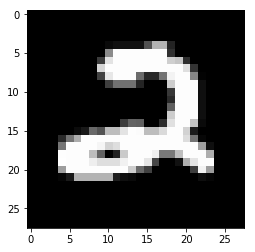

In [40]:
plt.imshow(X_test[0].reshape(28,28),cmap='gray')

In [41]:
Y_predicted[0][1]

2

## We have finished our task now time to go and upload our submission

# Got a score of *0.97728* on Kaggle. Go ahead and submit your predictions. 

## Do note that performance may vary even if you have the same model because of shuffling of data